In [111]:
from qutip import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook

In [106]:
class DicotomicProjector:
    def __init__(self, direction):
        sigma = [sigmax(),sigmay(),sigmaz()]
        self.dp_plus = 0.5*qeye(2)
        self.dp_minus = 0.5*qeye(2)
        for i in range(3):
            self.dp_plus += 0.5*direction[i]*sigma[i]
            self.dp_minus -= 0.5*direction[i]*sigma[i]
        self.dp = self.dp_plus - self.dp_minus

def dirvector(angles):
    return [np.cos(angles[0])*np.sin(angles[1]),np.sin(angles[0])*np.sin(angles[1]),np.cos(angles[1])]

def displayProgress(xk):
    #the callback function gets only the parameters vectors as an input, p must be changed every time accordingly
    history.append(func_free(xk, 1))
    return

def func_free(x, p):
    bell_state = (tensor(basis(2,0),basis(2,1))-tensor(basis(2,1),basis(2,0)))/np.sqrt(2)
    rho = p*bell_state*bell_state.dag() + (1 - p)*tensor(qeye(2),qeye(2))/4
    
    a0 = dirvector(x[0:2])
    a1 = dirvector(x[2:4])
    b0 = dirvector(x[4:6])
    b1 = dirvector(x[6:8])

    A0 = DicotomicProjector(a0)
    A1 = DicotomicProjector(a1)
    B0 = DicotomicProjector(b0)
    B1 = DicotomicProjector(b1)

    return (tensor(A0.dp,B0.dp)*rho).tr() + (tensor(A0.dp,B1.dp)*rho).tr() + (tensor(A1.dp,B0.dp)*rho).tr() - (tensor(A1.dp,B1.dp)*rho).tr()

In [107]:
#Spread dei parametri iniziali
x0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]
history=[]
#pure bell state
scipy.optimize.minimize(func_free,x0,args=(1),method='Nelder-Mead', callback=displayProgress,
                        options={'disp':True, 'maxiter':4000, 'xatol':0.001, 'fatol':0.001, 'adaptive':True})

Optimization terminated successfully.
         Current function value: -2.828427
         Iterations: 404
         Function evaluations: 652


 final_simplex: (array([[ 0.01314448,  0.54483102,  0.01779164, -1.02595132,  0.02508862,
        -0.2405362 ,  0.01605875,  1.33069165],
       [ 0.01314983,  0.54485346,  0.01804829, -1.02651988,  0.02484504,
        -0.24076179,  0.01626751,  1.32981928],
       [ 0.01314613,  0.54470411,  0.01771381, -1.0256697 ,  0.02534433,
        -0.24018002,  0.01605243,  1.33016141],
       [ 0.01315396,  0.54488716,  0.01775975, -1.02641852,  0.02519696,
        -0.24064187,  0.01564046,  1.32990356],
       [ 0.01314868,  0.54464698,  0.01826131, -1.02626361,  0.02450089,
        -0.24049757,  0.01617599,  1.3303022 ],
       [ 0.01314313,  0.54482619,  0.0177973 , -1.02560849,  0.02516538,
        -0.24033953,  0.0154662 ,  1.33035152],
       [ 0.01313945,  0.54488023,  0.01781962, -1.0258663 ,  0.02578004,
        -0.24084843,  0.01630305,  1.32985958],
       [ 0.01314874,  0.54467534,  0.01813823, -1.02637873,  0.02468634,
        -0.24098383,  0.01677378,  1.32969945],
       [ 0.0131

<IPython.core.display.Javascript object>


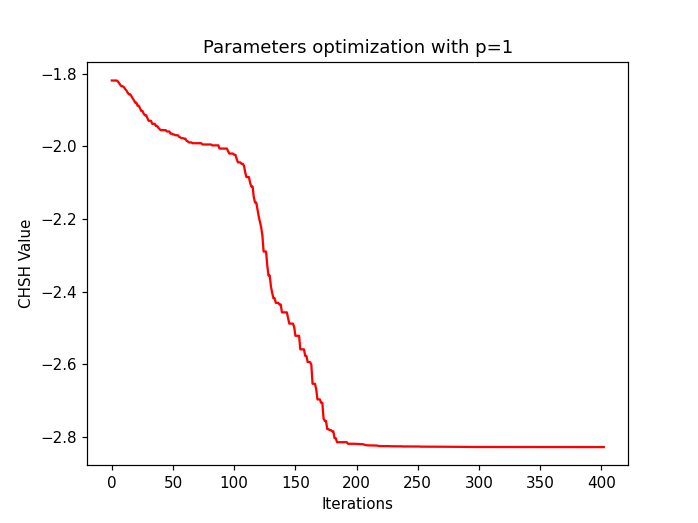

Text(0.5, 1.0, 'Parameters optimization with p=1')

In [115]:
plt.plot(history, 'r-')
plt.xlabel('Iterations')
plt.ylabel('CHSH Value')
plt.title('Parameters optimization with p=1')